In [1]:
import os 
from time import time 

import numpy as np 
import pandas as pd 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import xarray as xr 
import scipy.stats as stats 

from matplotlib import pyplot as plt 
import matplotlib as mpl 
mpl.rcParams['axes.grid'] = False 

import seaborn as sns 
sns.set(color_codes = True)

import cmlreaders 
from cmlreaders import CMLReader, get_data_index 
# from helper_funcs import *
print("imports imported <3 ")

imports imported <3 


In [ ]:
import mne 
from mne import channels 
from mne import time_frequency 

import ptsa 
from ptsa.data.timeseries import TimeSeries 
from ptsa.data import timeseries 

from ptsa.data.readers import BaseEventReader 

from ptsa.data.filters import MorletWaveletFilter 
from ptsa.data.filters import ButterworthFilter 

In [2]:
import matched_delib as current_md 

imports imported <3 
functions imported


## Behavioral Viz

In [3]:
def flag_plot(silence, recalls, choice_recalls, matched_delibs,n_lists,
             title):
    plt.close()
    s = silence.query("type == 'SILENCE_START'")
    voc = recalls 
    choice = choice_recalls 
    md = matched_delibs.query("type == 'SILENCE_START'")
    
    fig, ax = plt.subplots(figsize = [12,8])
    dpi = 600
    
        
    for x in range(1,n_lists):
        s_dat = np.asarray(s[s['list'] == x].rectime)
        sy = np.repeat(x, s_dat.shape[0])
        plt.plot(s_dat, sy, 'o', color = 'purple', markersize=4, label = 'silence')
        
        m_dat = np.asarray(md[md['list'] == x].rectime)
        my = np.repeat(x, m_dat.shape[0])
        plt.plot(m_dat, my, 's', color = 'blue', markersize=4, label = 'matched silence')
        
        v_dat = voc[voc['list'] == x].rectime
        vy = np.repeat(x, v_dat.shape[0])
        plt.plot(v_dat, vy, '^', color = 'orange', markersize=4, label = 'vocalization')
        
        c_dat = choice[choice['list'] == x].rectime
        cy = np.repeat(x, c_dat.shape[0])
        plt.plot(c_dat, cy, '^', color = 'green', markersize=4, label = 'used recall')
        
    
    plt.tight_layout()
    plt.title(title)
    plt.xlabel("time (ms)")
    plt.ylabel("list")
    plt.legend(['silence', 'matched_silence', 'vocalization', 'used recall'])

    plt.tight_layout()
    plt.show()
    
    

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Params 

In [5]:
experiment = 'ltpRepFR'
n_lists = 26
freqs = np.array([2**(np.log2(3) + (iFreq/4)) for iFreq in range(24)]) 
path = "/scratch/brandon.katerman/RepFR/{}/matched_power/session_{}/"
error_log_path = "/scratch/brandon.katerman/RepFR/{}/"
wave_number = 5
half_wav = ((1000 / freqs.min()) * wave_number) * 0.5
sr = 2048.


buffer_ms = (wave_number * (1000/freqs[0])) / 2
buffer_samp = int(np.ceil(buffer_ms * (sr/1000.)))
buffer_minimized = buffer_ms/1000


rec_wins = {'region': [-500, -25]}
rec_window = rec_wins['region']

# Run on all sesssions and subjects
ltpRepFR = get_data_index('ltp').query('experiment=="ltpRepFR"')
subjects = list(ltpRepFR.subject.unique())
sessions = np.arange(0,10)

In [56]:
DATA_FRAME = []
from tqdm import tqdm_notebook as timer
_cr = []
_used_rec = []
_matched_rec = []
_all_cr = []
subject = 'R1590T'
session = 0
experiment = 'RepFR1'
n_lists = 22
sr = 1000
subjects = []
sessions = []
srs = []

index = get_data_index('r1'); index = index[index.experiment == 'RepFR1'];
for i, df in timer(index.groupby(['subject', 'session'])):
    try:
        sub, sess = i
        reader = CMLReader(subject=sub, experiment='RepFR1', session=sess)
        events = reader.load('task_events').iloc[3:5]
        eeg = reader.load_eeg(events=events, rel_start = 0, rel_stop = 10)
        sr = eeg.samplerate
        subjects.append(sub)
        sessions.append(sess)
        srs.append(sr)
        del eeg; del reader; del events;
    except Exception as e:
        print(e)

Unable to find the requested file in any of the expected locations:
 /protocols/r1/subjects/R1590T/experiments/RepFR1/sessions/4/ephys/current_processed/sources.json
/data/eeg/R1590T/eeg.noreref/R1590T_RepFR1_3_10Nov21_1313.params.txt
/data/eeg/R1590T/eeg.noreref/params.txt



In [59]:
subjects = pd.DataFrame(dict(subject=subjects, session=sessions, sr = srs))

R1204T
session 0
Total vocalizations found: 163
total filtered recs: 7
Total silences found: 290
# matched periods of silence: 3.0
{'all_recs':        subj_sess subject  session  list         mstime  eegoffset item_name  \
0    R1204T_ses0  R1204T        0     1  1633023583046     495121             
1    R1204T_ses0  R1204T        0     1  1633023613045     525120        <>   
2    R1204T_ses0  R1204T        0     2  1633024416933    1329008             
3    R1204T_ses0  R1204T        0     2  1633024446918    1358993        <>   
4    R1204T_ses0  R1204T        0     3  1633024545399    1457474             
5    R1204T_ses0  R1204T        0     3  1633024575398    1487473        <>   
6    R1204T_ses0  R1204T        0     4  1633024680299    1592374             
7    R1204T_ses0  R1204T        0     4  1633024710283    1622358        <>   
8    R1204T_ses0  R1204T        0     5  1633024828067    1740142             
9    R1204T_ses0  R1204T        0     5  1633024836727    1748802 

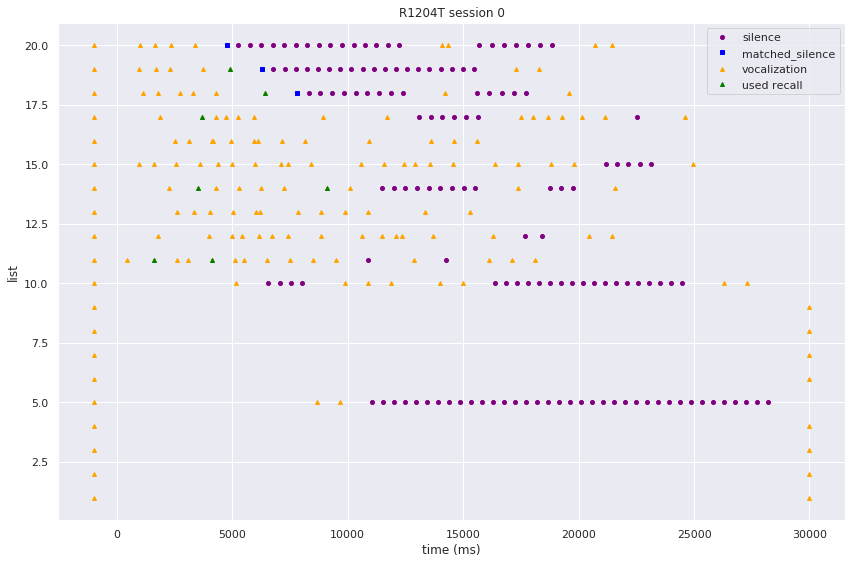

session 1


KeyboardInterrupt: 

In [62]:
DATA_FRAME = []

_cr = []
_used_rec = []
_matched_rec = []
_all_cr = []

for subj, df in subjects.groupby('subject'):
    print("{}".format(subj))
    
    subj_cr = []
    subj_all_cr = []
    subj_used_rec = []
    subj_matched_rec = []
    
    sessions = df.session.to_numpy()
    srs = df.sr.to_numpy()
    
    for i, sess in enumerate(sessions):
        print("session {}".format(sess))
        sr = srs[i]
        try:
            md_function = current_md.matched_delibs(subj,
                                                   sess,
                                                   experiment,
                                                   n_lists,
                                                   freqs,
                                                   wave_number,
                                                   rec_window,
                                                   sr,
                                                   pre_voc_exclusion = abs(rec_window[0]),
                                                   voca_dur = 550)
            
            print(md_function)
            
            #filter recall events 
            all_recs = md_function['all_recs']
            qry = ("(correct==1) & (repeat==0)")
            correct_recalls = all_recs.query(qry)
            
            correct_recall_count = correct_recalls.shape[0]; subj_all_cr.append(correct_recall_count)
            
            silence = md_function['silence']
            choice_recs = md_function['choice_recall']
            choice_rec_count = choice_recs.shape[0]; subj_cr.append(choice_rec_count)
            
            used_recalls = choice_rec_count / correct_recall_count ; subj_used_rec.append(used_recalls)
            matched_recall_count = md_function['delibs'].query("type == 'REC_WORD'").shape[0] / choice_rec_count 
            subj_matched_rec.append(matched_recall_count)
            
            
            sess_data = [subj, sess, choice_rec_count, correct_recall_count, matched_recall_count]
            DATA_FRAME.append(sess_data)
            
            print('{}% of correct recalls used in eligible recalls'.format(str(used_recalls *100)))
            print("{}% of eligible recalls matched to silence ".format(str(matched_recall_count * 100)))
        
            flag_plot(silence, all_recs, choice_recs, md_function['delibs'], n_lists, '{} session {}'.format(subj,sess))
            
        except Exception as e:
            print("error {} session {}: {}".format(subj,sess,e))
            
            
    _cr.append(np.asarray(subj_cr))
    _used_rec.append(np.asarray(subj_used_rec))
    _matched_rec.append(np.asarray(subj_matched_rec))
    _all_cr.append(np.asarray(subj_all_cr))